In [1]:
import numpy as np
from qiskit.ignis.characterization.coherence import t1_circuits

num_of_gates = np.linspace(10, 300, 5, dtype='int')
gate_time = 0.1

# Note that it is possible to measure several qubits in parallel
qubits = [0, 2]

t1_circs, t1_xdata = t1_circuits(num_of_gates, gate_time, qubits)

In [2]:
import qiskit
from qiskit.providers.aer.noise.errors.standard_errors \
            import thermal_relaxation_error
from qiskit.providers.aer.noise import NoiseModel

backend = qiskit.Aer.get_backend('qasm_simulator')
shots = 400

# Let the simulator simulate the following times for qubits 0 and 2:
t_q0 = 25.0
t_q2 = 15.0

# Define T\ :sub:`1` noise:
t1_noise_model = NoiseModel()
t1_noise_model.add_quantum_error(
thermal_relaxation_error(t_q0, 2*t_q0, gate_time),
                        'id', [0])
t1_noise_model.add_quantum_error(
    thermal_relaxation_error(t_q2, 2*t_q2, gate_time),
    'id', [2])

# Run the simulator
t1_backend_result = qiskit.execute(t1_circs, backend, shots=shots,
                                   noise_model=t1_noise_model,
                                   optimization_level=0).result()

[25.7117692325508, 16.31405115292517]
[8.416833339480858, 1.5028516653527668]
{'0': [array([ 1.01380102, 25.71176923, -0.02749114]), array([ 1.03940542, 16.31405115, -0.04797321])]}
{'0': [array([0.19064903, 8.41683334, 0.19821618]), array([0.03694779, 1.50285167, 0.04043049])]}


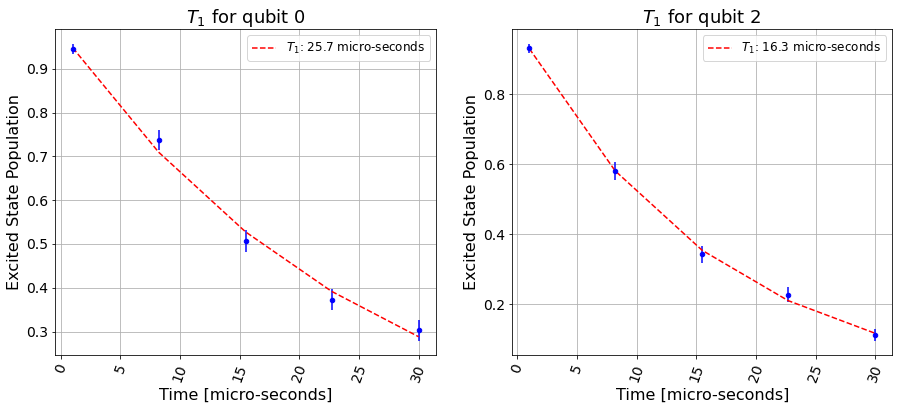

In [3]:
import matplotlib.pyplot as plt
from qiskit.ignis.characterization.coherence import T1Fitter

plt.figure(figsize=(15, 6))

t1_fit = T1Fitter(t1_backend_result, t1_xdata, qubits,
                  fit_p0=[1, t_q0, 0],
                  fit_bounds=([0, 0, -1], [2, 40, 1]))
print(t1_fit.time())
print(t1_fit.time_err())
print(t1_fit.params)
print(t1_fit.params_err)

for i in range(2):
    ax = plt.subplot(1, 2, i+1)
    t1_fit.plot(i, ax=ax)
plt.show()

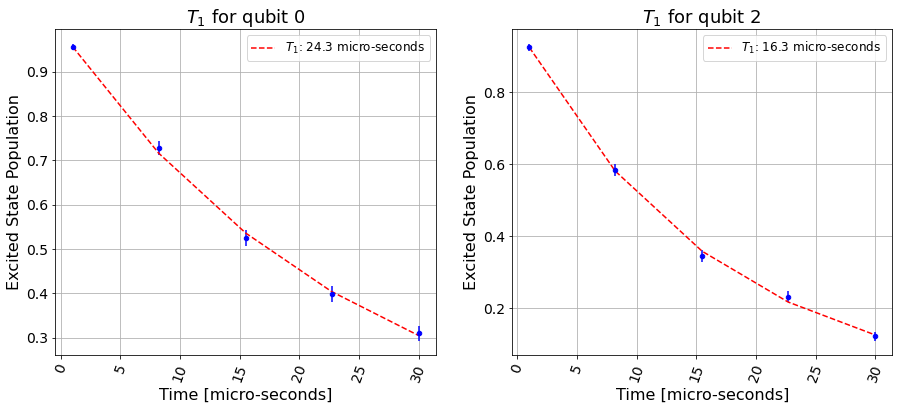

In [4]:
t1_backend_result_new = qiskit.execute(t1_circs, backend,
                                       shots=shots,
                                       noise_model=t1_noise_model,
                                       optimization_level=0).result()
t1_fit.add_data(t1_backend_result_new)

plt.figure(figsize=(15, 6))
for i in range(2):
    ax = plt.subplot(1, 2, i+1)
    t1_fit.plot(i, ax=ax)
plt.show()